In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/david/uni/SonarApp_utils/analysis.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


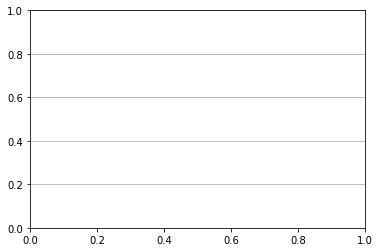

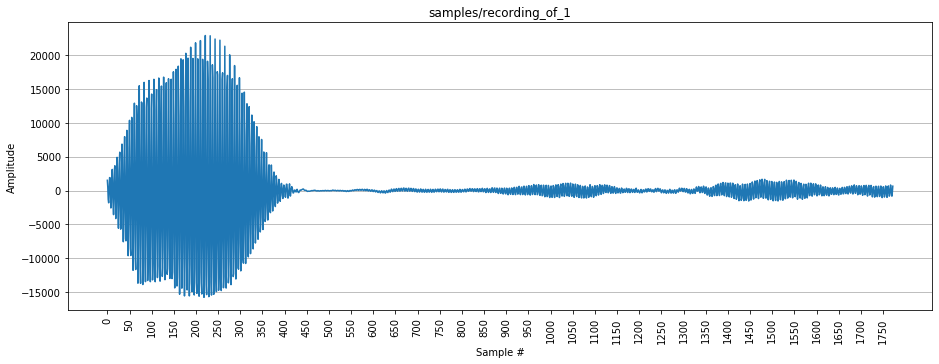

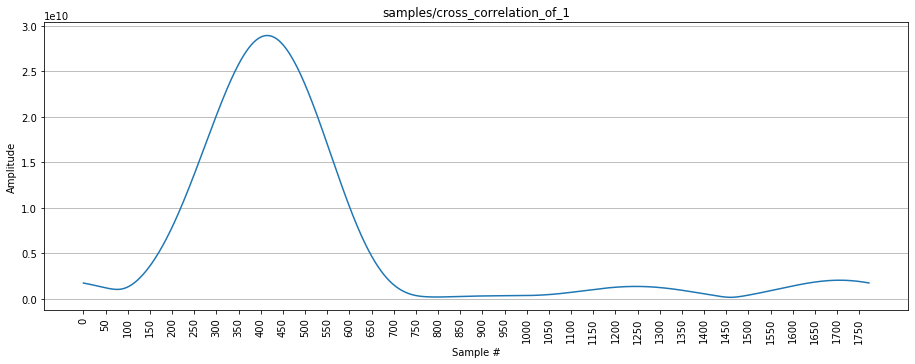

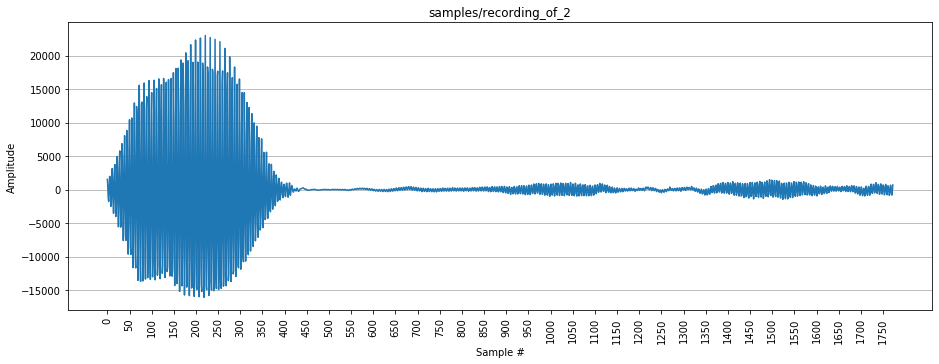

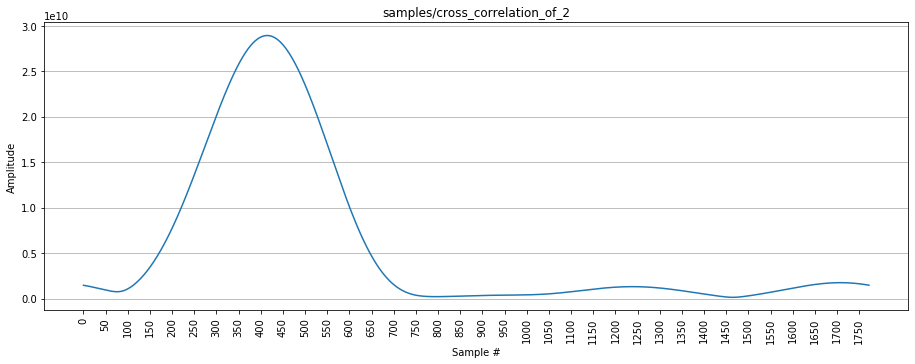

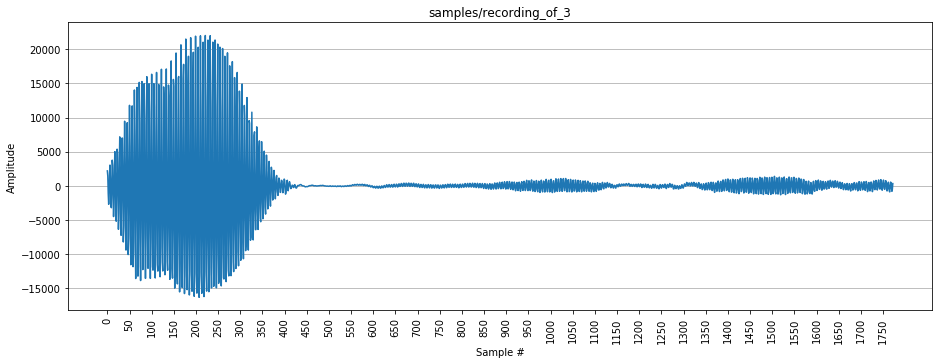

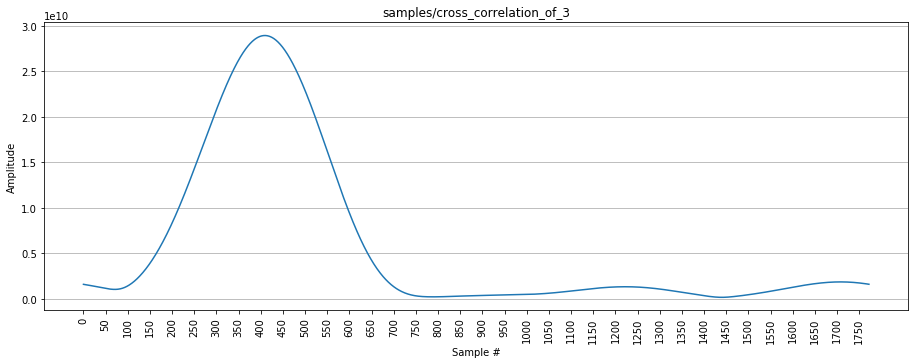

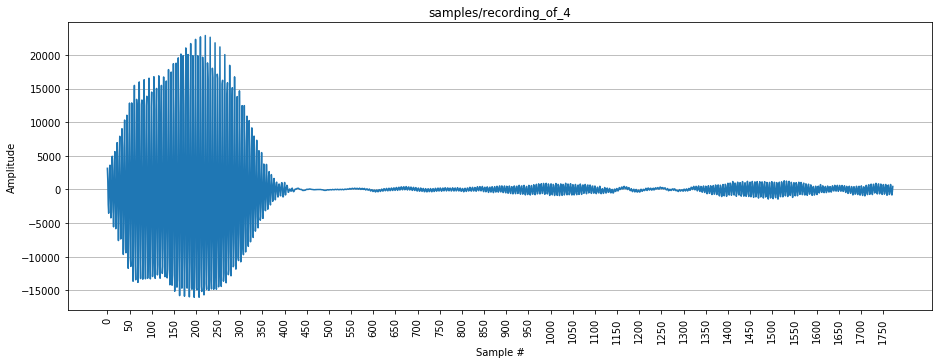

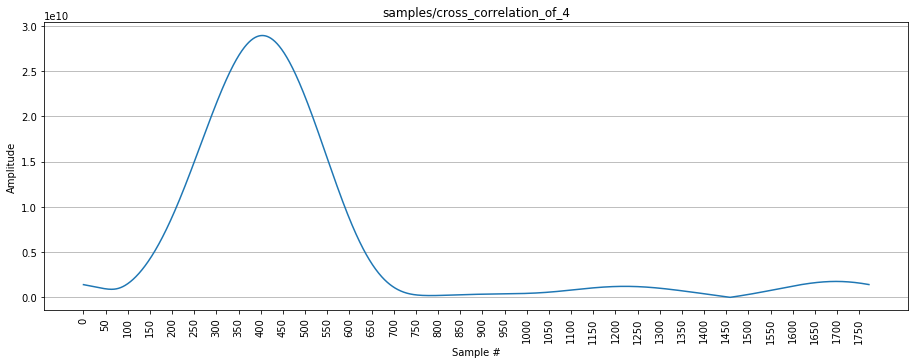

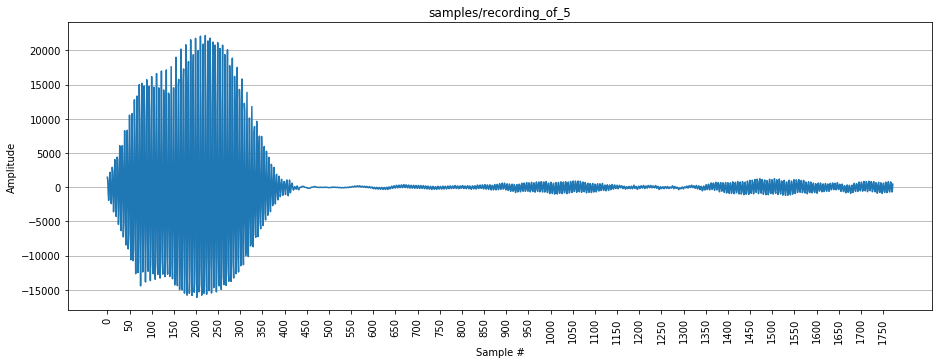

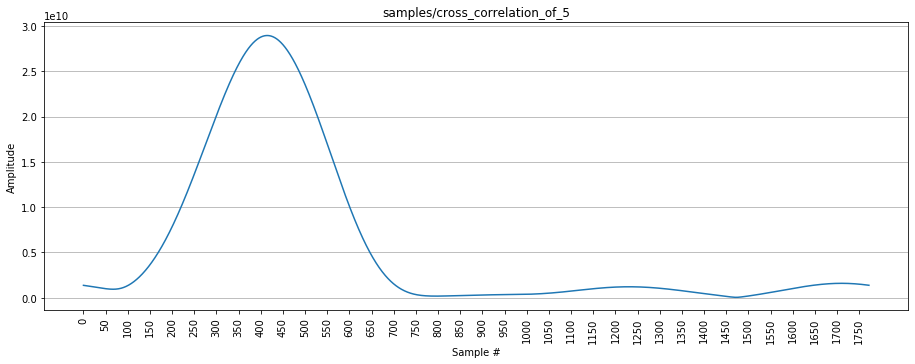

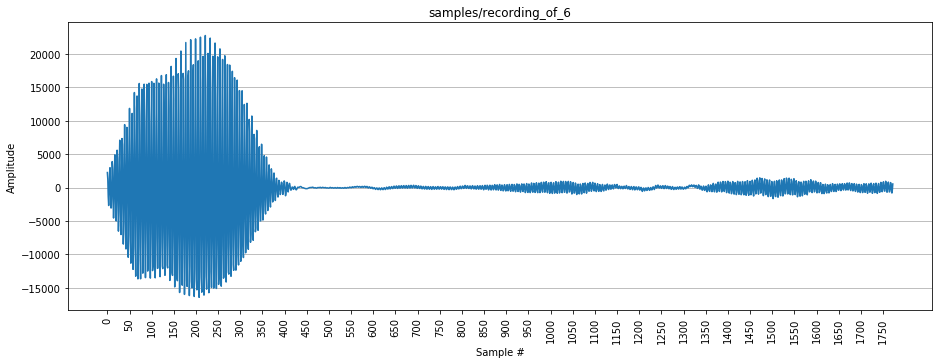

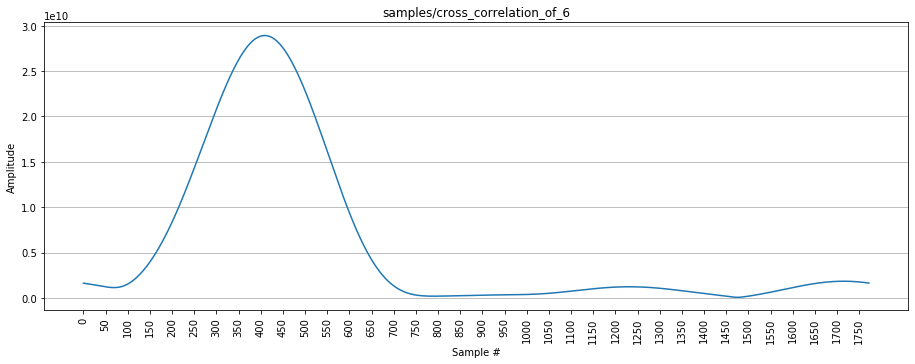

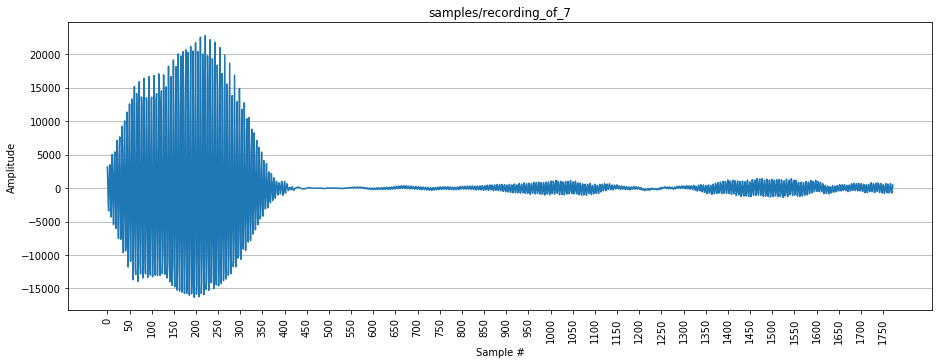

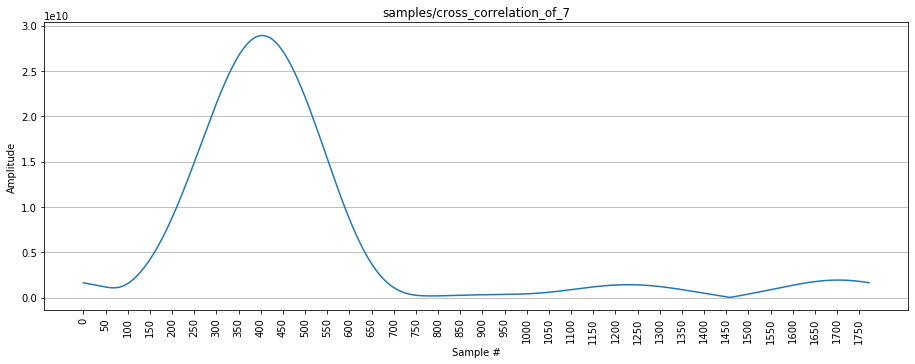

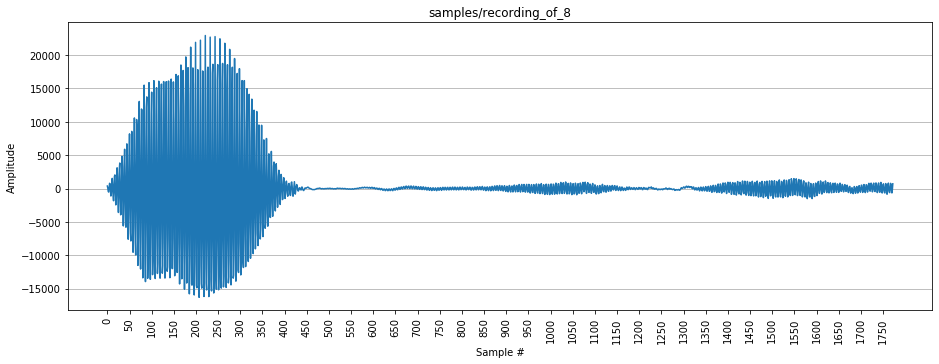

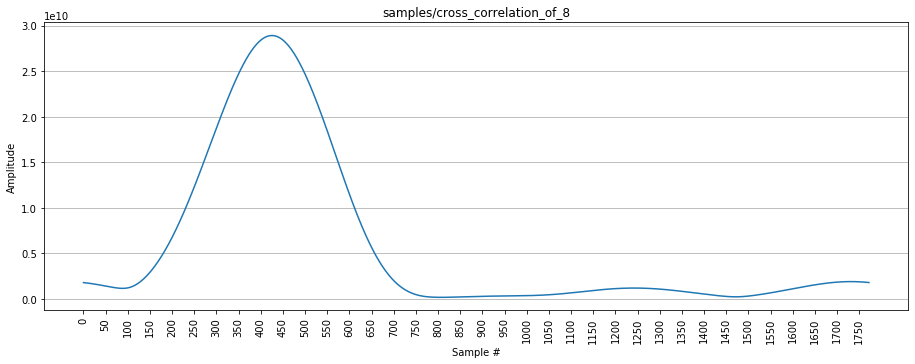

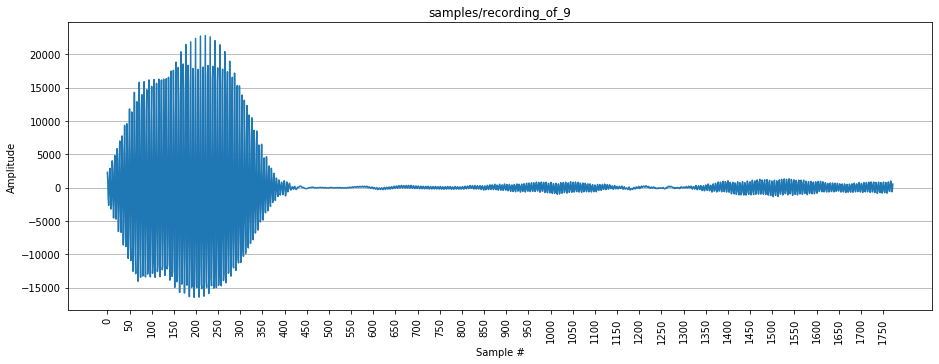

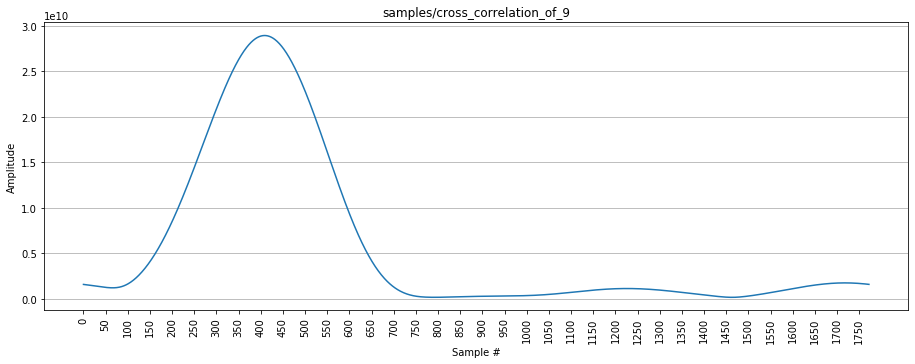

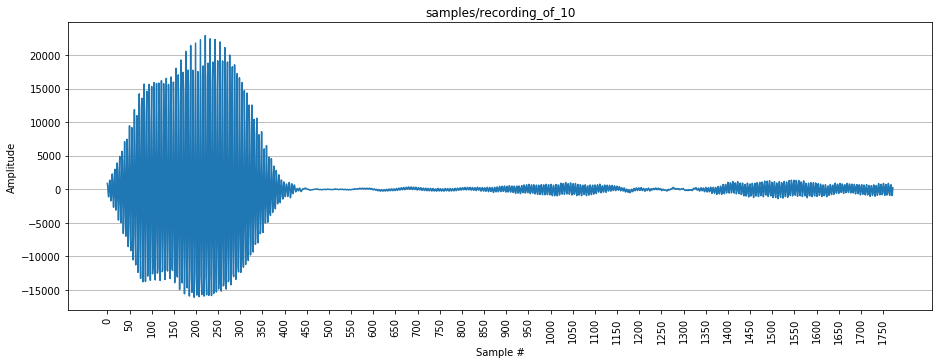

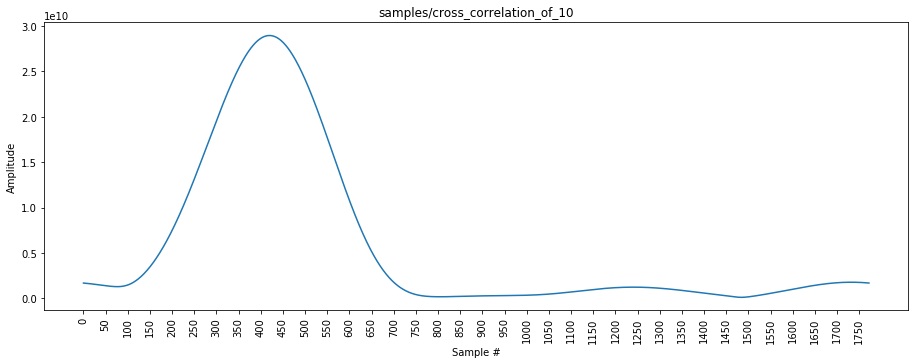

In [8]:
%matplotlib inline

import analysis

# analysis.get_graph_figure(analysis.get_chirp(), 'Chirp')
for i in range(1, 11):
    analysis.show_recording(i)
    analysis.show_cross_correlation(i)